# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [3]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [4]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [5]:
# Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


In [6]:
# you can also transpose the data
df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe().T
# also you can save the data to a variable
# df_stats = df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe().T
# you can also save the result to csv file
# df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe().T.to_csv('summary.csv')

,count,mean,std,min,25%,50%,75%,max
fare_amount,10000.0,15.106313,13.954762,-52.00,7.000,10.0,16.00,176.0
tip_amount,10000.0,2.634494,3.409800,0.00,0.000,2.0,3.25,43.0
tolls_amount,10000.0,0.623447,6.437507,-6.12,0.000,0.0,0.00,612.0
total_amount,10000.0,22.564659,19.209255,-65.92,12.375,16.3,22.88,671.8


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [8]:
df.trip_distance.max(), max(df.trip_distance)

(38.11, 38.11)

In [9]:
df[df.trip_distance == df.trip_distance.max()]


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
8338,2,2019-10-23T16:50:53.000,2019-10-24T15:32:55.000,1,38.11,5,N,132,265,1,176.0,0.0,0.5,18.29,6.12,0.3,201.21,0.0


In [10]:
df[df.trip_distance==max(df.trip_distance)][['fare_amount','tip_amount','tolls_amount','total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


In [11]:
# conver trip_distance to kilometers
# vectorized operation
df['trip_distance_km'] = df.trip_distance * 1.60934 # this will loop through the data and convert each row
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_km
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5,12.762066
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0,3.218680
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5,2.188702
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5,1.609340
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5,3.154306


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [2]:
import pandas as pd
meteorites = pd.read_csv("../data/Meteorite_Landings.csv")
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [3]:
meteorites.rename(columns={'mass (g)':"mass"}, inplace=True)
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
# lets drop last 3 columns
# this works when you know exatly which columns you want to drop
# meteorites.drop(columns=['GeoLocation', 'reclat', 'reclong'], inplace=True)
# so I select all columns except the last 3
meteorites = meteorites[meteorites.columns[:-3]]
meteorites.head()

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM


In [5]:
meteorites.sort_values(by='mass', ascending=False, inplace=True)
meteorites.head(10)

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,01/01/1836 12:00:00 AM
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,01/01/1852 12:00:00 AM
26297,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,01/01/1911 12:00:00 AM
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,01/01/1863 12:00:00 AM


In [6]:
meteorites['kg'] = meteorites.mass / 1000
meteorites.head(10)

,name,id,nametype,recclass,mass,fall,year,kg
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,60000.0
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,58200.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,50000.0
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,30000.0
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,28000.0
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,01/01/1836 12:00:00 AM,26000.0
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,01/01/1852 12:00:00 AM,24300.0
26297,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,01/01/1911 12:00:00 AM,24000.0
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,23000.0
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,01/01/1863 12:00:00 AM,22000.0


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [7]:
meteorites['year'] = pd.to_datetime(meteorites['year'],errors = 'coerce' )  # change the format to date-time beforae
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,kg
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0


In [8]:
meteorites['only_year'] = pd.DatetimeIndex(meteorites['year']).year
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,kg,only_year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0,1920.0
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0,1818.0
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0,NaN
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0,1891.0
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0,1898.0


In [9]:
meteorites.set_index('id', inplace=True)
meteorites.head()

,name,nametype,recclass,mass,fall,year,kg,only_year
id,,,,,,,,
11890,Hoba,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0,1920.0
5262,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0,1818.0
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0,NaN
5257,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0,1891.0
2335,Armanty,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0,1898.0


In [12]:
meteorites['sub_str'] = meteorites.fall.str[:4]
meteorites.head()


,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str
id,,,,,,,,,
11890,Hoba,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0,1920.0,Foun
5262,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0,1818.0,Foun
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0,NaN,Foun
5257,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0,1891.0,Foun
2335,Armanty,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0,1898.0,Foun


In [15]:
# if we have strings(object type) in our data 
# we can use str slicing to get the first 4 characters
meteorites["also_year"] = meteorites.year_str.str[:4]
meteorites.head()

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str,also_year
id,,,,,,,,,,,
11890,Hoba,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0,1920.0,Foun,1920-01-01 00:00:00,1920
5262,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0,1818.0,Foun,1818-01-01 00:00:00,1818
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0,NaN,Foun,NaT,NaT
5257,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0,1891.0,Foun,1891-01-01 00:00:00,1891
2335,Armanty,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0,1898.0,Foun,1898-01-01 00:00:00,1898


In [13]:
meteorites.fall.unique()

array(['Found', 'Fell'], dtype=object)

In [14]:
meteorites["year_str"] = meteorites.year.astype(str)
meteorites.head()

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str
id,,,,,,,,,,
11890,Hoba,Valid,"Iron, IVB",60000000.0,Found,1920-01-01,60000.0,1920.0,Foun,1920-01-01 00:00:00
5262,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01,58200.0,1818.0,Foun,1818-01-01 00:00:00
5247,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,NaT,50000.0,NaN,Foun,NaT
5257,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01,30000.0,1891.0,Foun,1891-01-01 00:00:00
2335,Armanty,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01,28000.0,1898.0,Foun,1898-01-01 00:00:00


In [17]:
meteorites.sort_index(inplace=True)
meteorites.head()

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str,also_year
id,,,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880-01-01,0.021,1880.0,Fell,1880-01-01 00:00:00,1880
2,Aarhus,Valid,H6,720.0,Fell,1951-01-01,0.720,1951.0,Fell,1951-01-01 00:00:00,1951
4,Abajo,Valid,H5,331.0,Found,1982-01-01,0.331,1982.0,Foun,1982-01-01 00:00:00,1982
5,Abbott,Valid,H3-6,21100.0,Found,1951-01-01,21.100,1951.0,Foun,1951-01-01 00:00:00,1951
6,Abee,Valid,EH4,107000.0,Fell,1952-01-01,107.000,1952.0,Fell,1952-01-01 00:00:00,1952


In [18]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 57458
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       45716 non-null  object        
 1   nametype   45716 non-null  object        
 2   recclass   45716 non-null  object        
 3   mass       45585 non-null  float64       
 4   fall       45716 non-null  object        
 5   year       45404 non-null  datetime64[ns]
 6   kg         45585 non-null  float64       
 7   only_year  45404 non-null  float64       
 8   sub_str    45716 non-null  object        
 9   year_str   45716 non-null  object        
 10  also_year  45716 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 4.2+ MB


In [19]:
# if we have a datetime data type then we use to_datetime before comparing
# we create a new column with boolean values
meteorites["before_1970"] = meteorites.year < pd.to_datetime('1970-01-01')
meteorites.head()

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str,also_year,before_1970
id,,,,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880-01-01,0.021,1880.0,Fell,1880-01-01 00:00:00,1880,True
2,Aarhus,Valid,H6,720.0,Fell,1951-01-01,0.720,1951.0,Fell,1951-01-01 00:00:00,1951,True
4,Abajo,Valid,H5,331.0,Found,1982-01-01,0.331,1982.0,Foun,1982-01-01 00:00:00,1982,False
5,Abbott,Valid,H3-6,21100.0,Found,1951-01-01,21.100,1951.0,Foun,1951-01-01 00:00:00,1951,True
6,Abee,Valid,EH4,107000.0,Fell,1952-01-01,107.000,1952.0,Fell,1952-01-01 00:00:00,1952,True


In [23]:
# so loc is label index which means it includes the index name start and end
meteorites.loc[10036:10040] # so tricky case cae there is no 10040 but it would have been included if it was there

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str,also_year,before_1970
id,,,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967-01-01,0.094,1967.0,Foun,1967-01-01 00:00:00,1967,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883-01-01,0.763,1883.0,Foun,1883-01-01 00:00:00,1883,True
10038,Enshi,Valid,H5,8000.0,Fell,1974-01-01,8.000,1974.0,Fell,1974-01-01 00:00:00,1974,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,NaT,127.000,NaN,Fell,NaT,NaT,False


In [24]:
meteorites.shape

(45716, 12)

In [27]:
# pandas get index as list
meteorites.index.min(), meteorites.index.max() # so there are some missing values in this index because it is not a continues index

(1, 57458)

In [28]:
# again if you need specific numeric index then you can use iloc
meteorites.iloc[0:5] # first five rows of course 0 is optional, and 5 - row 6 is not included
# so just like using head(5) but this is more flexible

,name,nametype,recclass,mass,fall,year,kg,only_year,sub_str,year_str,also_year,before_1970
id,,,,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880-01-01,0.021,1880.0,Fell,1880-01-01 00:00:00,1880,True
2,Aarhus,Valid,H6,720.0,Fell,1951-01-01,0.720,1951.0,Fell,1951-01-01 00:00:00,1951,True
4,Abajo,Valid,H5,331.0,Found,1982-01-01,0.331,1982.0,Foun,1982-01-01 00:00:00,1982,False
5,Abbott,Valid,H3-6,21100.0,Found,1951-01-01,21.100,1951.0,Foun,1951-01-01 00:00:00,1951,True
6,Abee,Valid,EH4,107000.0,Fell,1952-01-01,107.000,1952.0,Fell,1952-01-01 00:00:00,1952,True


In [29]:
meteorites.iloc[3:8, 2:5] # so this is the same as loc but using numeric index
# so this gets rows 4 to 8 (9th row not included)
# and columns 3 to 5 (6th column not included)
# just like any other slicing in python
# 0 based index
# last value is not included

,recclass,mass,fall
id,,,
5,H3-6,21100.0,Found
6,EH4,107000.0,Fell
7,L6,2914.0,Found
8,H,1.2,Found
9,H4,4500.0,Found


In [21]:
meteorites.index.dtype

dtype('int64')

#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
meteorites = pd.read_csv("../data/Meteorite_Landings.csv")

meteorites['year'] = pd.to_datetime(meteorites['year'],errors='coerce') 
meteorites['only_year'] = pd.DatetimeIndex(meteorites['year']).year

meteorites.rename(columns={'mass (g)':"mass"}, inplace=True)

meteorites.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,only_year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"(50.775, 6.08333)",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"(56.18333, 10.23333)",1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"(54.21667, -113.0)",1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"(16.88333, -99.9)",1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"(-33.16667, -64.95)",1902.0


In [3]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45716 non-null  object        
 1   id           45716 non-null  int64         
 2   nametype     45716 non-null  object        
 3   recclass     45716 non-null  object        
 4   mass         45585 non-null  float64       
 5   fall         45716 non-null  object        
 6   year         45404 non-null  datetime64[ns]
 7   reclat       38401 non-null  float64       
 8   reclong      38401 non-null  float64       
 9   GeoLocation  38401 non-null  object        
 10  only_year    45404 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [4]:
#so we are using two masks to filter the data
# we use & to combine the two masks
my_data = meteorites.loc[(meteorites['only_year'] >= 2005) & (meteorites['only_year'] <= 2009)]
my_data.shape

(6974, 11)

In [5]:
# we can skip loc and use the mask directly, there is no difference other than readability
same_data = meteorites[(meteorites['only_year'] >= 2005) & (meteorites['only_year'] <= 2009)]
same_data.shape

(6974, 11)

In [6]:
my_data.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,only_year
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008-01-01,20.74575,32.41275,"(20.74575, 32.41275)",2008.0
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009-01-01,31.80500,-97.01000,"(31.805, -97.01)",2009.0
82,Bassikounou,44876,Valid,H5,29560.0,Fell,2006-01-01,15.78333,-5.90000,"(15.78333, -5.9)",2006.0
101,Berduc,48975,Valid,L6,270.0,Fell,2008-01-01,-31.91000,-58.32833,"(-31.91, -58.32833)",2008.0
148,Bunburra Rockhole,48653,Valid,Eucrite,324.0,Fell,2007-01-01,-31.35000,129.19000,"(-31.35, 129.19)",2007.0
156,Buzzard Coulee,48654,Valid,H4,41000.0,Fell,2008-01-01,52.99600,-109.84817,"(52.996, -109.84817)",2008.0
160,Cali,45976,Valid,H/L4,478.0,Fell,2007-01-01,3.40500,-76.51000,"(3.405, -76.51)",2007.0
169,Carancas,45817,Valid,H4-5,342.0,Fell,2007-01-01,-16.66444,-69.04389,"(-16.66444, -69.04389)",2007.0
195,Chergach,47347,Valid,H5,100000.0,Fell,2007-01-01,23.69639,-5.01472,"(23.69639, -5.01472)",2007.0
228,Daule,51559,Valid,L5,6580.0,Fell,2008-01-01,-1.87089,-79.95756,"(-1.87089, -79.95756)",2008.0


In [7]:
my_data.fall.unique()

array(['Fell', 'Found'], dtype=object)

In [8]:
my_data.fall.value_counts()

Found    6947
Fell       27
Name: fall, dtype: int64

In [ ]:
# when we pivot on fall column we will get two columns
# one for each value in fall column


In [12]:

pivot_table = pd.pivot_table(my_data, values = 'mass', index='only_year', columns = 'fall',
aggfunc=['count', lambda x: x.quantile(0.95)]).reset_index().rename(columns={'<lambda>':'95th_percentile'})

pivot_table

only_year count         95th_percentile         
fall            Fell   Found            Fell    Found
0       2005.0   NaN   874.0             NaN  4500.00
1       2006.0   5.0  2450.0         25008.0  1600.50
2       2007.0   8.0  1181.0         89675.0  1126.90
3       2008.0   9.0   948.0        106000.0  2274.80
4       2009.0   5.0  1492.0          8333.4  1397.25

In [10]:
# we can also use groupby
grouped_df = my_data.groupby(['only_year','fall']).agg({'fall':'count','mass':[lambda x: np.percentile(x, 95)]})
grouped_df

fall       mass
                count   <lambda>
only_year fall                  
2005.0    Found   875        NaN
2006.0    Fell      5   25008.00
          Found  2451        NaN
2007.0    Fell      8   89675.00
          Found  1181    1126.90
2008.0    Fell      9  106000.00
          Found   948    2274.80
2009.0    Fell      5    8333.40
          Found  1492    1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [13]:
meteorites.groupby(['fall']).describe()['mass']

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


In [15]:
meteorites.groupby(['fall']).describe().T
# so we did a lot of extra work actually

fall                     Fell         Found
id        count  1.107000e+03  4.460900e+04
          mean   1.644736e+04  2.714887e+04
          std    1.046256e+04  1.690710e+04
          min    1.000000e+00  4.000000e+00
          25%    1.008350e+04  1.292200e+04
          50%    1.542600e+04  2.473300e+04
          75%    2.310150e+04  4.450900e+04
          max    5.716800e+04  5.745800e+04
mass      count  1.075000e+03  4.451000e+04
          mean   4.707072e+04  1.246192e+04
          std    7.170671e+05  5.711058e+05
          min    1.000000e-01  0.000000e+00
          25%    6.860000e+02  6.940000e+00
          50%    2.800000e+03  3.050000e+01
          75%    1.045000e+04  1.780000e+02
          max    2.300000e+07  6.000000e+07
reclat    count  1.097000e+03  3.730400e+04
          mean   3.004385e+01 -4.115656e+01
          std    2.312658e+01  4.531758e+01
          min   -4.411667e+01 -8.736667e+01
          25%    2.186667e+01 -7.671667e+01
          50%    3.610000e+01 -7.150000e+01
          75%    4.606667e+01  0.000000e+00
          max    6.634833e+01  8.116667e+01
reclong   count  1.097000e+03  3.730400e+04
          mean   2.013438e+01  6.227824e+01
          std    6.886669e+01  8.065465e+01
          min   -1.578667e+02 -1.654333e+02
          25%   -4.233330e+00  0.000000e+00
          50%    1.871667e+01  3.566667e+01
          75%    7.626667e+01  1.571667e+02
          max    1.744000e+02  3.544733e+02
only_year count  1.088000e+03  4.431600e+04
          mean   1.918108e+03  1.993860e+03
          std    5.905612e+01  1.715180e+01
          min    1.688000e+03  1.716000e+03
          25%    1.877000e+03  1.988000e+03
          50%    1.925000e+03  1.998000e+03
          75%    1.965000e+03  2.003000e+03
          max    2.013000e+03  2.101000e+03

In [16]:
# slightly better would be to select column first and then describe
meteorites.groupby(['fall'])['mass'].describe()
# this way we do not need to calculate the stats for all columns

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [18]:
# read taxi data
df = pd.read_csv("../data/2019_Yellow_Taxi_Trip_Data.csv")
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               10000 non-null  int64  
 1   tpep_pickup_datetime   10000 non-null  object 
 2   tpep_dropoff_datetime  10000 non-null  object 
 3   passenger_count        10000 non-null  int64  
 4   trip_distance          10000 non-null  float64
 5   ratecodeid             10000 non-null  int64  
 6   store_and_fwd_flag     10000 non-null  object 
 7   pulocationid           10000 non-null  int64  
 8   dolocationid           10000 non-null  int64  
 9   payment_type           10000 non-null  int64  
 10  fare_amount            10000 non-null  float64
 11  extra                  10000 non-null  float64
 12  mta_tax                10000 non-null  float64
 13  tip_amount             10000 non-null  float64
 14  tolls_amount           10000 non-null  float64
 15  imp

In [20]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vendorid               10000 non-null  int64         
 1   tpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   passenger_count        10000 non-null  int64         
 4   trip_distance          10000 non-null  float64       
 5   ratecodeid             10000 non-null  int64         
 6   store_and_fwd_flag     10000 non-null  object        
 7   pulocationid           10000 non-null  int64         
 8   dolocationid           10000 non-null  int64         
 9   payment_type           10000 non-null  int64         
 10  fare_amount            10000 non-null  float64       
 11  extra                  10000 non-null  float64       
 12  mta_tax                10000 non-null  float64       
 13  ti

In [24]:
df.set_index('tpep_dropoff_datetime', inplace=True)
df.sort_index(inplace=True)
df.head(10)

,vendorid,tpep_pickup_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2,2019-10-23 07:48:58,1,0.67,1,N,263,141,2,4.5,1.0,0.5,0.00,0.0,0.3,8.80,2.5
2019-10-23 08:03:16,2,2019-10-23 07:05:34,3,14.68,1,N,132,181,1,50.0,1.0,0.5,4.00,0.0,0.3,55.80,0.0
2019-10-23 08:36:05,2,2019-10-23 08:18:47,1,2.39,1,N,164,237,2,12.5,1.0,0.5,0.00,0.0,0.3,16.80,2.5
2019-10-23 09:33:13,2,2019-10-23 09:27:16,2,1.11,1,N,151,41,2,6.0,1.0,0.5,0.00,0.0,0.3,7.80,0.0
2019-10-23 09:49:31,2,2019-10-23 09:47:25,2,0.47,2,N,238,43,2,52.0,4.5,0.5,0.00,0.0,0.3,59.80,2.5
2019-10-23 12:53:49,2,2019-10-23 12:35:27,5,2.49,1,N,262,238,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5
2019-10-23 13:09:40,2,2019-10-23 12:56:53,2,1.40,1,N,186,43,1,9.5,1.0,0.5,3.45,0.0,0.3,17.25,2.5
2019-10-23 13:31:57,2,2019-10-23 13:15:05,2,2.76,1,N,137,114,1,12.5,1.0,0.5,1.00,0.0,0.3,17.80,2.5
2019-10-23 13:33:52,2,2019-10-23 13:15:19,5,2.82,1,N,50,151,2,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5


In [25]:
df.tail(5)

,vendorid,tpep_pickup_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,,,
2019-10-24 16:46:42,2,2019-10-23 16:49:40,1,3.55,1,N,261,246,2,15.5,1.0,0.5,0.0,0.0,0.3,19.8,2.5
2019-10-24 16:47:40,2,2019-10-23 16:49:36,1,2.54,1,N,143,236,1,11.0,1.0,0.5,2.3,0.0,0.3,17.6,2.5
2019-10-24 16:50:22,2,2019-10-23 16:51:42,1,11.19,1,N,132,62,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0
2019-10-24 16:51:44,2,2019-10-23 16:52:51,1,3.75,1,N,162,41,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5
2019-10-24 17:15:47,2,2019-10-23 17:19:31,2,7.48,1,N,141,217,2,29.0,1.0,0.5,0.0,0.0,0.3,33.3,2.5


In [27]:
df.shape

(10000, 17)

In [26]:
d60m = df.resample('60min').sum()
d60m.shape

C:\Users\val-wd\AppData\Local\Temp\ipykernel_2576\2264869384.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d60m = df.resample('60min').sum()


(35, 15)

In [28]:
d60m.head()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,
2019-10-23 07:00:00,2,1,0.67,1,263,141,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5
2019-10-23 08:00:00,4,4,17.07,2,296,418,3,62.5,2.0,1.0,4.0,0.0,0.6,72.6,2.5
2019-10-23 09:00:00,4,4,1.58,3,389,84,4,58.0,5.5,1.0,0.0,0.0,0.6,67.6,2.5
2019-10-23 10:00:00,0,0,0.00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-23 11:00:00,0,0,0.00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# only selecting the columns we need
d60m = d60m[['trip_distance','fare_amount', 'tolls_amount', 'tip_amount']]
d60m.head()

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,0.67,4.5,0.0,0.0
2019-10-23 08:00:00,17.07,62.5,0.0,4.0
2019-10-23 09:00:00,1.58,58.0,0.0,0.0
2019-10-23 10:00:00,0.00,0.0,0.0,0.0
2019-10-23 11:00:00,0.00,0.0,0.0,0.0


In [31]:
d60m = d60m.sort_values(by='tip_amount', ascending=False)
d60m.head(5)

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


In [34]:
# same approach would be using nlargest
# documenation for nlargest
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
d60m5 = d60m.nlargest(5, 'tip_amount') # this gives you the top 5 rows
d60m5

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [2]:
tsa_melted_holiday_travel = pd.read_csv("../data/tsa_melted_holiday_travel.csv")
tsa_melted_holiday_travel.head()

,date,year,travelers,holiday
0,2019-01-01,2019,2126398.0,New Year's Day
1,2019-01-02,2019,2345103.0,New Year's Day
2,2019-01-03,2019,2202111.0,NaN
3,2019-01-04,2019,2150571.0,NaN
4,2019-01-05,2019,1975947.0,NaN


In [45]:
plot_data = tsa_melted_holiday_travel\
    .pivot_table(columns = 'year', values = 'travelers')
plot_data

year,2019,2020,2021
travelers,2.309482e+06,881867.380822,1.112632e+06


In [3]:
from matplotlib import ticker

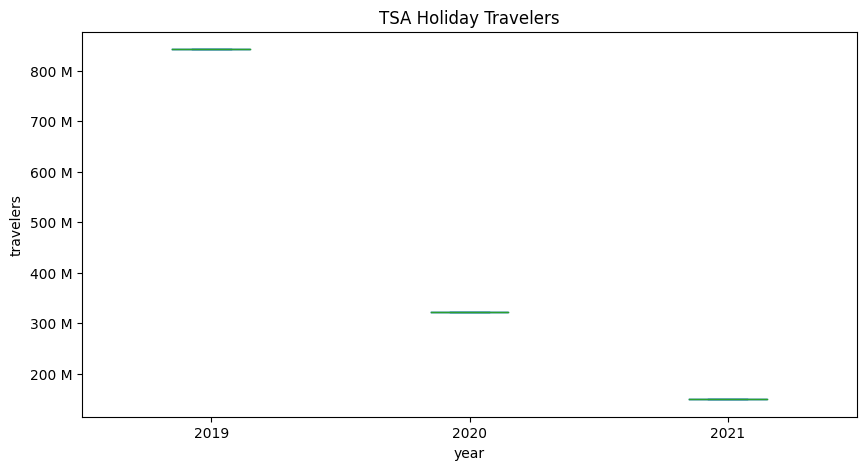

In [44]:
ax = plot_data.plot(kind='box', figsize=(10,5))
ax.set(xlabel="year", ylabel="travelers", title="TSA Holiday Travelers")
ax.yaxis.set_major_formatter(ticker.EngFormatter())


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [24]:
tsa_df = pd.read_csv('../data/tsa_melted_holiday_travel.csv', parse_dates=True, index_col='date')
tsa_df.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


In [25]:
tsa_df['year'] = pd.to_datetime(tsa_df['year'], errors='coerce')
tsa_df.head()

,year,travelers,holiday
date,,,
2019-01-01,1970-01-01 00:00:00.000002019,2126398.0,New Year's Day
2019-01-02,1970-01-01 00:00:00.000002019,2345103.0,New Year's Day
2019-01-03,1970-01-01 00:00:00.000002019,2202111.0,NaN
2019-01-04,1970-01-01 00:00:00.000002019,2150571.0,NaN
2019-01-05,1970-01-01 00:00:00.000002019,1975947.0,NaN


In [6]:
tsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       864 non-null    object        
 1   year       864 non-null    datetime64[ns]
 2   travelers  864 non-null    float64       
 3   holiday    54 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 27.1+ KB


In [27]:
import numpy as np

In [28]:
travelers_2019 = tsa_df.loc['2019']\
  .assign(month=lambda x: x.index.month, weekday=lambda x: x.index.weekday)\
  .pivot_table(index='month', columns='weekday', values='travelers', aggfunc=np.median)

In [29]:
travelers_2019.shape

(12, 7)

In [7]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt
import calendar

In [14]:
tsa_df.set_index('year', inplace=True)
tsa_df.head()

,date,travelers,holiday
year,,,
2019,2019-01-01,2126398.0,New Year's Day
2019,2019-01-02,2345103.0,New Year's Day
2019,2019-01-03,2202111.0,NaN
2019,2019-01-04,2150571.0,NaN
2019,2019-01-05,1975947.0,NaN


In [20]:
tsa_df.index.unique()

Int64Index([2019, 2020, 2021], dtype='int64', name='year')

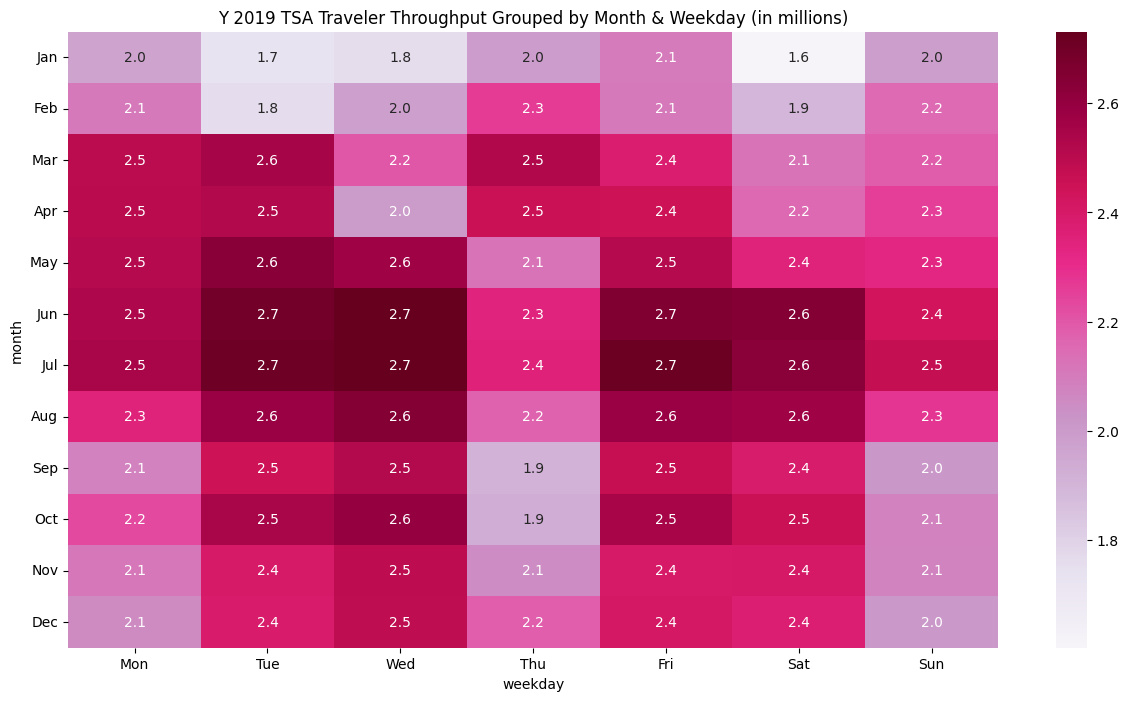

In [30]:

plt.figure(figsize = (15,8))
ax = sns.heatmap(data=travelers_2019 / 1e6, cmap='PuRd', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_xticklabels(calendar.day_abbr)
_ = ax.set_title('Y 2019 TSA Traveler Throughput Grouped by Month & Weekday (in millions)')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.